알고리즘 수렴 (iteration 2)
Cluster 0: [2.0, 3.0]
Cluster 1: [11.0, 12.0, 20.0]


/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_22398/3832738679.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  members = [float(x) for x in cluster]


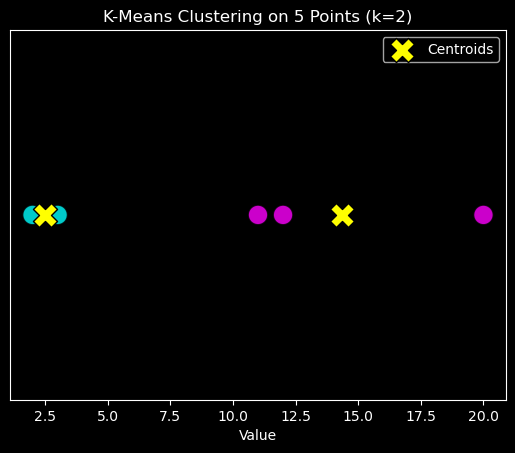

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# K-Means Clustering 알고리즘 직접 구현
class KMeansClustering:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    # 데이터와 초기 중심점을 정하는 함수
    def initialize_centroids(self, X):
        indices = np.random.choice(len(X), self.k, replace=False)
        centroids = X[indices]
        return centroids

    # 각 데이터를 가장 가까운 중심점으로 할당하는 함수
    def assign_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.k)]
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            closest_index = np.argmin(distances)
            clusters[closest_index].append(x)
        return clusters

    # 중심점 재계산 함수 (평균 좌표)
    def calculate_centroids(self, clusters):
        centroids = np.zeros((self.k, clusters[0][0].shape[0]))
        for idx, cluster in enumerate(clusters):
            centroids[idx] = np.mean(cluster, axis=0)
        return centroids

    # 전체 알고리즘 수행
    def fit(self, X):
        centroids = self.initialize_centroids(X)

        for iteration in range(self.max_iters):
            clusters = self.assign_clusters(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_centroids(clusters)

            # 중심점이 변하지 않으면 종료
            if np.allclose(centroids, previous_centroids):
                print(f"알고리즘 수렴 (iteration {iteration})")
                break

        self.centroids = centroids
        self.clusters = clusters

    # 군집화 결과 반환 함수 (예측)
    def predict(self, X):
        labels = np.zeros(len(X), dtype=int)
        for i, x in enumerate(X):
            distances = [np.linalg.norm(x - centroid) for centroid in self.centroids]
            labels[i] = np.argmin(distances)
        return labels


# — 예시 데이터 생성: 처음 보여준 5개 값 —
# A:2, B:3, C:11, D:12, E:20
X = np.array([[ 2.],
              [ 3.],
              [11.],
              [12.],
              [20.]])

# K-Means 알고리즘 적용 (k=2)
kmeans = KMeansClustering(k=2)
kmeans.fit(X)

# 군집 결과 예측
labels = kmeans.predict(X)

# 클러스터 구성 출력
for idx, cluster in enumerate(kmeans.clusters):
    members = [float(x) for x in cluster]
    print(f"Cluster {idx}: {members}")

# 1D 데이터 시각화 (y=0 고정)
y_zero = np.zeros_like(X.flatten())
plt.scatter(X.flatten(), y_zero, c=labels, cmap='cool', s=200, edgecolors='k', alpha=0.8)
plt.scatter(kmeans.centroids.flatten(), np.zeros_like(kmeans.centroids.flatten()),
            c='yellow', marker='X', s=300, edgecolors='k', label='Centroids')
plt.yticks([])  # y축 생략
plt.xlabel("Value")
plt.title("K-Means Clustering on 5 Points (k=2)")
plt.legend()
plt.show()